In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("analysis.csv")

In [3]:
df.head()

,AGE,GENDER,DIABETIC,FAMILY HISTORY,MEDICATION FOR SUGAR,SUGARY FOOD INTAKE,PHYSICAL ACTIVITY,SLEEP HOURS,TYPE 1/2 AWARENESS,KNOWLEDGE
0,20,M,NO,NO,NO,2,2,3,NO,3
1,62,M,NO,YES,NO,1,4,2,NO,4
2,62,M,NO,NO,NO,2,4,3,YES,2
3,65,M,NO,NO,NO,2,4,3,NO,1
4,65,M,YES,YES,YES,1,3,3,YES,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AGE                   58 non-null     int64 
 1   GENDER                58 non-null     object
 2   DIABETIC              58 non-null     object
 3   FAMILY HISTORY        58 non-null     object
 4   MEDICATION FOR SUGAR  58 non-null     object
 5   SUGARY FOOD INTAKE    58 non-null     int64 
 6   PHYSICAL ACTIVITY     58 non-null     int64 
 7   SLEEP HOURS           58 non-null     int64 
 8   TYPE 1/2 AWARENESS    58 non-null     object
 9   KNOWLEDGE             58 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 4.7+ KB


In [5]:
df.head()

,AGE,GENDER,DIABETIC,FAMILY HISTORY,MEDICATION FOR SUGAR,SUGARY FOOD INTAKE,PHYSICAL ACTIVITY,SLEEP HOURS,TYPE 1/2 AWARENESS,KNOWLEDGE
0,20,M,NO,NO,NO,2,2,3,NO,3
1,62,M,NO,YES,NO,1,4,2,NO,4
2,62,M,NO,NO,NO,2,4,3,YES,2
3,65,M,NO,NO,NO,2,4,3,NO,1
4,65,M,YES,YES,YES,1,3,3,YES,2


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])  
df['DIABETIC'] = le.fit_transform(df['DIABETIC'])
df['MEDICATION FOR SUGAR'] = le.fit_transform(df['MEDICATION FOR SUGAR'])
df['TYPE 1/2 AWARENESS'] = le.fit_transform(df['TYPE 1/2 AWARENESS']) 
df['FAMILY HISTORY'] = le.fit_transform(df['FAMILY HISTORY']) 

In [7]:
df.head()

,AGE,GENDER,DIABETIC,FAMILY HISTORY,MEDICATION FOR SUGAR,SUGARY FOOD INTAKE,PHYSICAL ACTIVITY,SLEEP HOURS,TYPE 1/2 AWARENESS,KNOWLEDGE
0,20,1,0,0,0,2,2,3,0,3
1,62,1,0,1,0,1,4,2,0,4
2,62,1,0,0,0,2,4,3,1,2
3,65,1,0,0,0,2,4,3,0,1
4,65,1,1,1,1,1,3,3,1,2


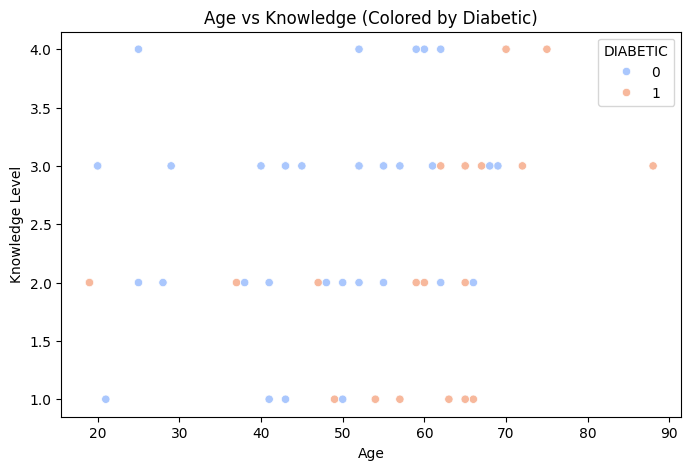

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='AGE', y='KNOWLEDGE', hue='DIABETIC', palette='coolwarm')
plt.title('Age vs Knowledge (Colored by Diabetic)')
plt.xlabel('Age')
plt.ylabel('Knowledge Level')
plt.show()

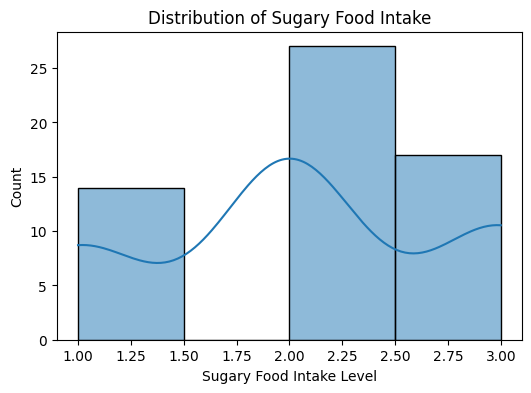

In [9]:
plt.figure(figsize=(6, 4))
sns.histplot(df['SUGARY FOOD INTAKE'], kde=True, bins=4)
plt.title('Distribution of Sugary Food Intake')
plt.xlabel('Sugary Food Intake Level')
plt.ylabel('Count')
plt.show()

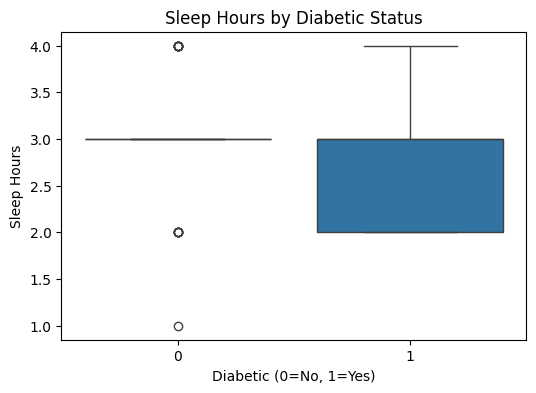

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='DIABETIC', y='SLEEP HOURS')
plt.title('Sleep Hours by Diabetic Status')
plt.xlabel('Diabetic (0=No, 1=Yes)')
plt.ylabel('Sleep Hours')
plt.show()

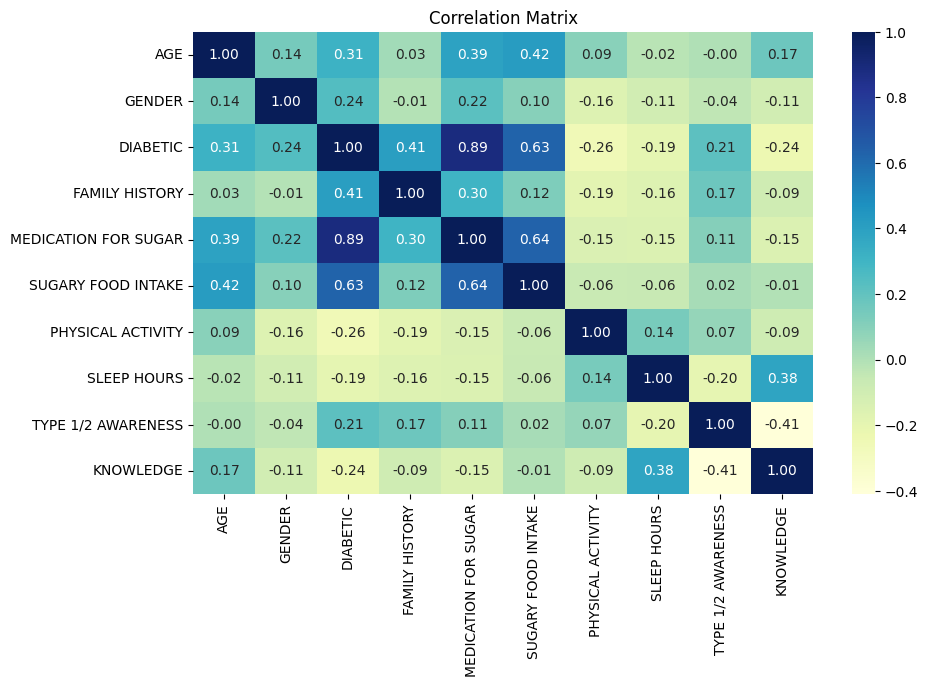

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


C:\Users\DEEP\AppData\Local\Temp\ipykernel_4168\1761837239.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='TYPE 1/2 AWARENESS', y='KNOWLEDGE', ci=None)


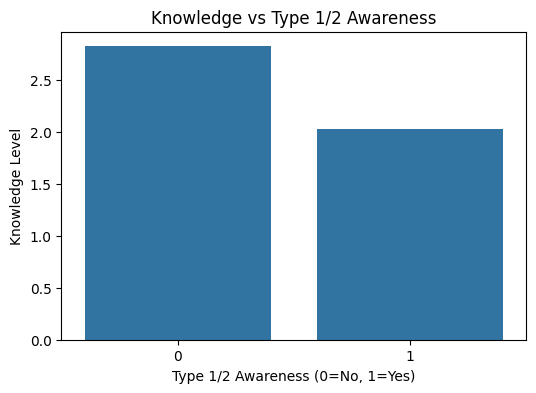

In [12]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='TYPE 1/2 AWARENESS', y='KNOWLEDGE', ci=None)
plt.title('Knowledge vs Type 1/2 Awareness')
plt.xlabel('Type 1/2 Awareness (0=No, 1=Yes)')
plt.ylabel('Knowledge Level')
plt.show()


In [13]:
df=df.drop(columns=['SLEEP HOURS','TYPE 1/2 AWARENESS','KNOWLEDGE'])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [15]:
X = df.drop('DIABETIC', axis=1)
y = df['DIABETIC']

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Evaluate models
print("Model Accuracies on DIABETIC Prediction:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name}: {acc:.2f}")

Model Accuracies on DIABETIC Prediction:

Logistic Regression: 0.83
Random Forest: 0.83
SVM: 0.83
Decision Tree: 0.83
K-Nearest Neighbors: 0.83
Naive Bayes: 0.83


In [16]:
# Impute and scale input
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# ---- Step 3: Train a model (KNN here) ----
model = KNeighborsClassifier()
model.fit(X_scaled, y)

# ---- Step 4: Define your sample input ----
sample_input = [[65, 0, 1, 1, 1, 1]]


# ---- Step 5: Apply same imputer and scaler ----
sample_imputed = imputer.transform(sample_input)
sample_scaled = scaler.transform(sample_imputed)

# ---- Step 6: Predict ----
prediction = model.predict(sample_scaled)
print("Diabetic Prediction (0 = No, 1 = Yes):", prediction[0])


Diabetic Prediction (0 = No, 1 = Yes): 1


C:\Users\DEEP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [17]:
df.head()

,AGE,GENDER,DIABETIC,FAMILY HISTORY,MEDICATION FOR SUGAR,SUGARY FOOD INTAKE,PHYSICAL ACTIVITY
0,20,1,0,0,0,2,2
1,62,1,0,1,0,1,4
2,62,1,0,0,0,2,4
3,65,1,0,0,0,2,4
4,65,1,1,1,1,1,3


In [18]:
import joblib
joblib.dump(imputer, 'imputer.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'knn_model.pkl')

['knn_model.pkl']

In [19]:
# ---- Step 1: Load .pkl files ----
import joblib

imputer = joblib.load('imputer.pkl')
scaler = joblib.load('scaler.pkl')
model = joblib.load('knn_model.pkl')

# ---- Step 2: Use on New Input ----
sample_input = [[19, 1, 1, 0, 1, 1]]
sample_imputed = imputer.transform(sample_input)
sample_scaled = scaler.transform(sample_imputed)
prediction = model.predict(sample_scaled)

print("Diabetic Prediction (0 = No, 1 = Yes):", prediction[0])


C:\Users\DEEP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


Diabetic Prediction (0 = No, 1 = Yes): 0
